**1.DATA MANIPULATION**

A.Read the provided CSV file ‘data.csv’

In [3]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [4]:
import pandas as pd

df = pd.read_csv("data.csv")
print(df.head())


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


C.Show the basic statistical description about the data

In [5]:
print(df.describe())


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


D.Check if the data has null values.
i. Replace the null values with the mean

In [6]:
print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)

print(df.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


E.Select at least two columns and aggregate the data using: min, max, count, mean

In [9]:
agg_result = df[["Calories", "Pulse"]].agg(["min", "max", "count", "mean"])
print(agg_result)


          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


F.Filter the dataframe to select the rows with calories values between 500 and 1000.

In [10]:
df_cal_500_1000 = df[(df["Calories"] >= 500) & (df["Calories"] <= 1000)]
print(df_cal_500_1000)


     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


G.Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

In [11]:
df_filtered = df[(df["Calories"] > 500) & (df["Pulse"] < 100)]
print(df_filtered)


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


H.Create a new “df_modified” dataframe that contains all the columns from df except for
“Maxpulse”.

In [25]:
df_modified = df.drop(columns=["Maxpulse"], errors="ignore")
print(df_modified)




     Duration  Pulse  Calories
0          60    110       409
1          60    117       479
2          60    103       340
3          45    109       282
4          45    117       406
..        ...    ...       ...
164        60    105       290
165        60    110       300
166        60    115       310
167        75    120       320
168        75    125       330

[169 rows x 3 columns]


I.Delete the “Maxpulse” column from the main df dataframe

In [13]:
df.drop(columns=["Maxpulse"], inplace=True)

print(df.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


J.Convert the datatype of Calories column to int datatype

In [14]:
df["Calories"] = df["Calories"].astype(int)

print(df.dtypes)


Duration    int64
Pulse       int64
Calories    int64
dtype: object


K.Using pandas create a scatter plot for the two columns (Duration and Calories.

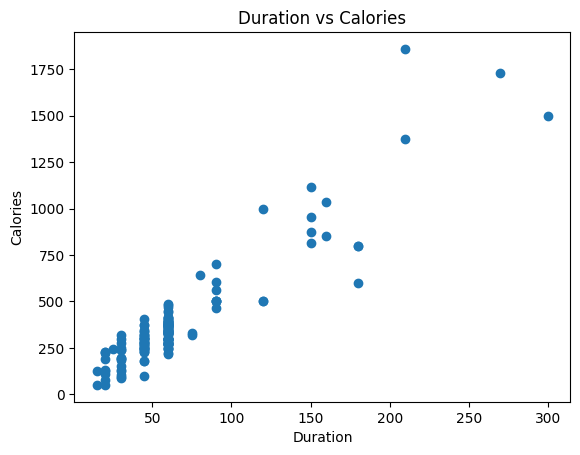

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df["Duration"], df["Calories"])
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Duration vs Calories")
plt.show()


**2.LINEAR REGRESSION**

In [18]:
from google.colab import files
uploaded = files.upload()


Saving Salary_Data.csv to Salary_Data.csv


In [19]:
import pandas as pd

salary_df = pd.read_csv("Salary_Data.csv")
print(salary_df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


B.Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset

In [20]:
from sklearn.model_selection import train_test_split

X = salary_df[["YearsExperience"]]
y = salary_df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 20
Test size: 10


C.Train and predict the model.

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Predictions:")
print(y_pred[:5])


Predictions:
[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028]


D.Calculate the mean_squared error

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 35301898.887134895


E.Visualize both train and test data using scatter plot

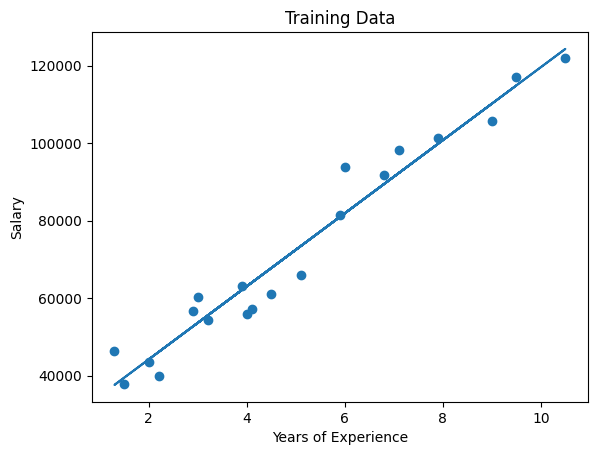

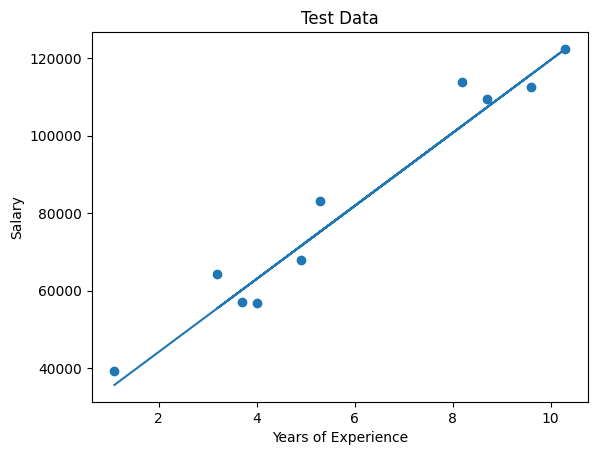

In [23]:
import matplotlib.pyplot as plt

# Training data
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))
plt.title("Training Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Test data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.title("Test Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
